## Explore data

In [39]:
import pandas as pd

df = pd.read_csv('./codecademy-stack-overflow-survey-trends/developer_dataset.csv')

print("\n{}\n".format(df.columns))
print("\n{}\n".format(df.count()))
print("\n{}\n".format(df.describe()))

C:\Users\AdamLaviguer\AppData\Local\Temp\ipykernel_5268\2332198556.py:3: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./codecademy-stack-overflow-survey-trends/developer_dataset.csv')



Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')


RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs        

## Delete Highly Missing Data

In [40]:
for column in df.columns:
    total_rows = df.shape[0]
    non_null_count = df[column].count()
    missing_count = total_rows - non_null_count
    missing_percentage = (missing_count / total_rows) * 100
    print("Column: {:<30} Missing Values: {:<10} ({:.2f}%)".format(column, missing_count, missing_percentage))

print("\nTotal Rows: {}".format(df.shape[0]))
print("Total Columns: {}\n".format(df.shape[1]))

df.drop(['NEWJobHunt','NEWJobHuntResearch','NEWLearn'], axis=1, inplace=True)
print("\nTotal Rows: {}".format(df.shape[0]))
print("Total Columns AFTER DROP: {}\n".format(df.shape[1]))

Column: RespondentID                   Missing Values: 0          (0.00%)
Column: Year                           Missing Values: 0          (0.00%)
Column: Country                        Missing Values: 0          (0.00%)
Column: Employment                     Missing Values: 1784       (1.60%)
Column: UndergradMajor                 Missing Values: 12756      (11.47%)
Column: DevType                        Missing Values: 10776      (9.69%)
Column: LanguageWorkedWith             Missing Values: 9191       (8.26%)
Column: LanguageDesireNextYear         Missing Values: 15165      (13.64%)
Column: DatabaseWorkedWith             Missing Values: 25350      (22.79%)
Column: DatabaseDesireNextYear         Missing Values: 36975      (33.25%)
Column: PlatformWorkedWith             Missing Values: 19600      (17.62%)
Column: PlatformDesireNextYear         Missing Values: 25833      (23.23%)
Column: Hobbyist                       Missing Values: 42857      (38.54%)
Column: OrgSize                

## Analyze Developers by Country

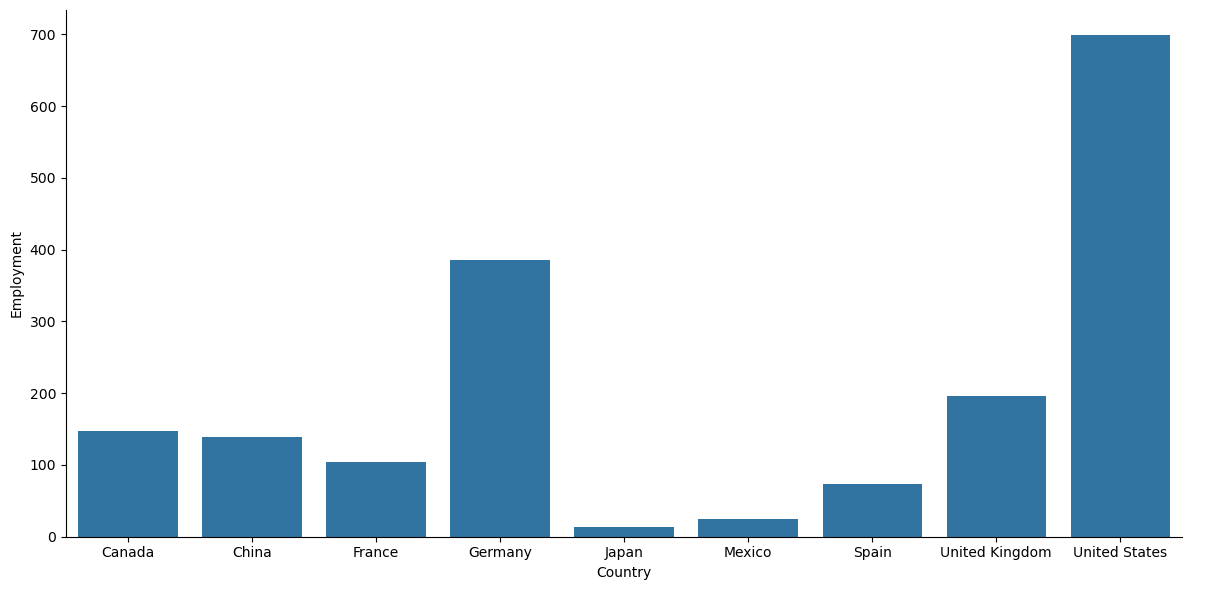

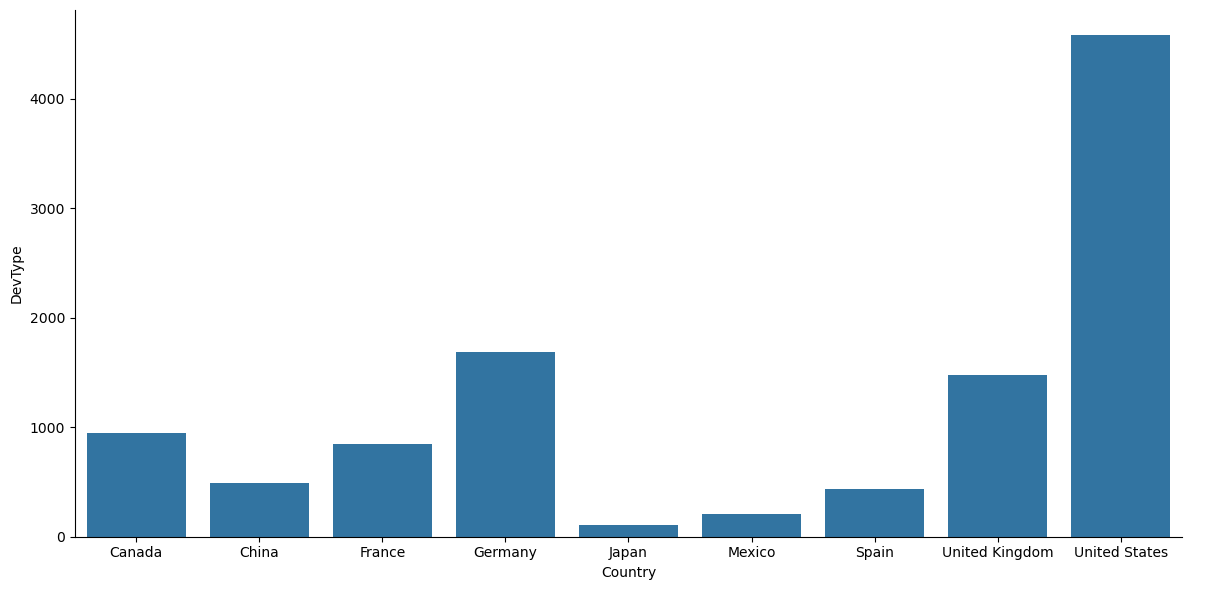

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

df[['RespondentID','Country']].groupby('Country').count()

missingData = df[['Employment','DevType']].isnull().groupby(df['Country']).sum().reset_index()

A=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="Employment",
    height = 6, aspect = 2)
B=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="DevType",
    height = 6, aspect = 2)

C:\Users\AdamLaviguer\AppData\Local\Temp\ipykernel_5268\2979868500.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
C:\Users\AdamLaviguer\AppData\Local\Temp\ipykernel_5268\2979868500.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
C:\Users\AdamLaviguer\AppData\Local\Temp\ipykernel_5268\2979868500.py:13: SettingWithCopyWarning: 
A value is trying to be set o

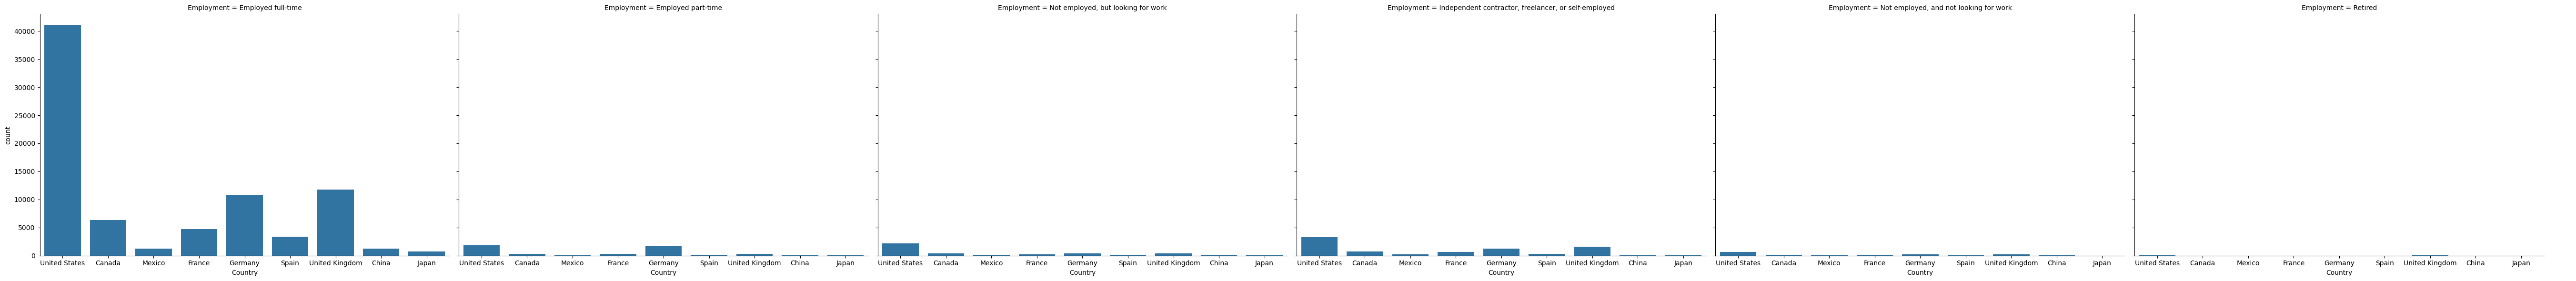

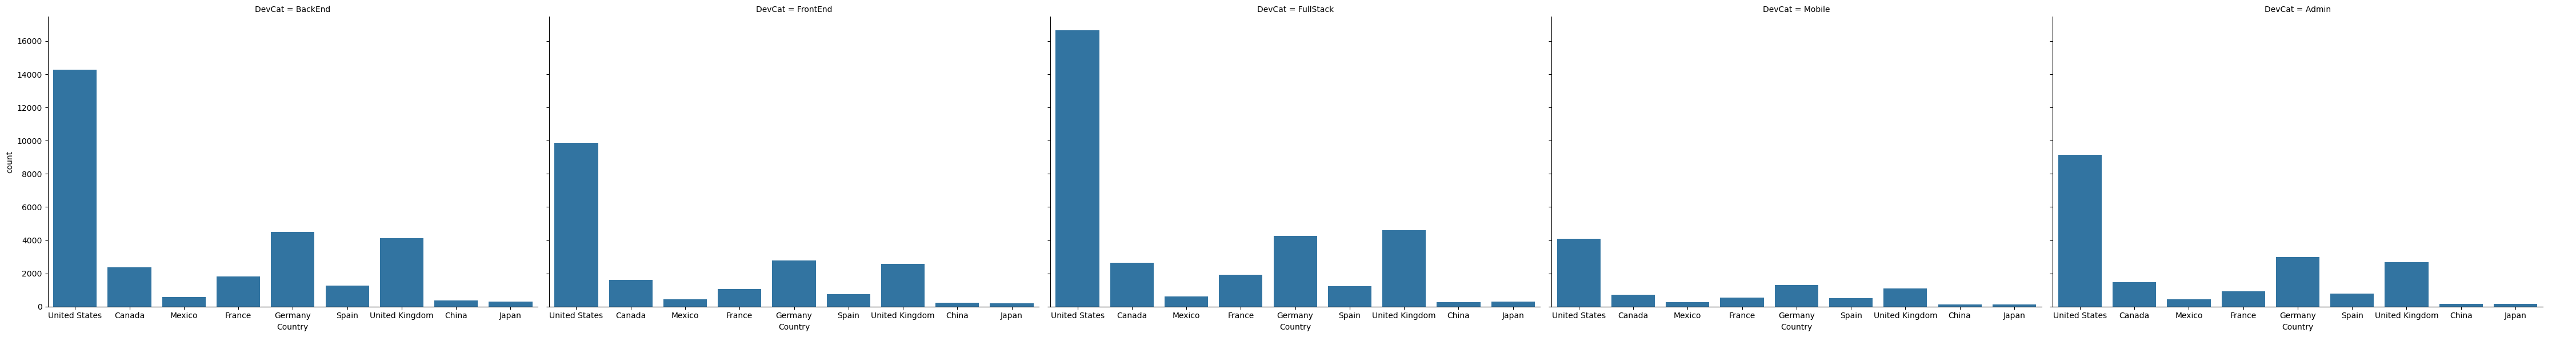

In [42]:
df.dropna(subset = ['Employment','DevType'],
    inplace = True,
    how = 'any')

empfig = sns.catplot(x="Country", col="Employment",
                data=df, kind="count",
                height=6, aspect=1.5);

# Focus on a few of the key developer types outlined in the Stack Overflow survey
devdf = df[['Country','DevType']]
devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
devdf.loc[devdf['DevType'].str.contains('full-stack'), 'FullStack'] = True
devdf.loc[devdf['DevType'].str.contains('mobile'), 'Mobile'] = True
devdf.loc[devdf['DevType'].str.contains('administrator'), 'Admin'] = True

devdf = devdf.melt(id_vars=['Country'], 
    value_vars=['BackEnd','FrontEnd','FullStack','Mobile','Admin'], 
    var_name='DevCat',
    value_name='DevFlag')

devdf.dropna(how='any', inplace=True)

devFig = sns.catplot(x="Country", col="DevCat",
                data=devdf, kind="count",
                height=6, aspect=1.5);


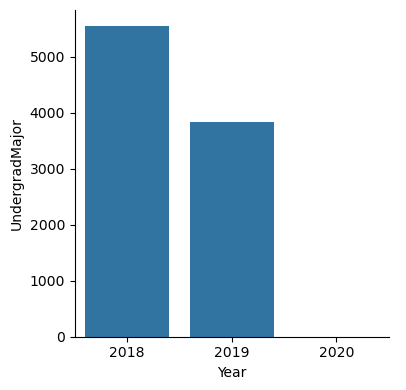

In [43]:
missingUndergrad = df['UndergradMajor'].isnull().groupby(df['Year']).sum().reset_index()

sns.catplot(x="Year", y="UndergradMajor",
                data=missingUndergrad, kind="bar",
                height=4, aspect=1);

C:\Users\AdamLaviguer\AppData\Local\Temp\ipykernel_5268\2016160955.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['UndergradMajor'].bfill(axis=0, inplace=True)
C:\Users\AdamLaviguer\AppData\Local\Temp\ipykernel_5268\2016160955.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.dropna(how='any', inplace=True)
C:\Users\AdamLavigu

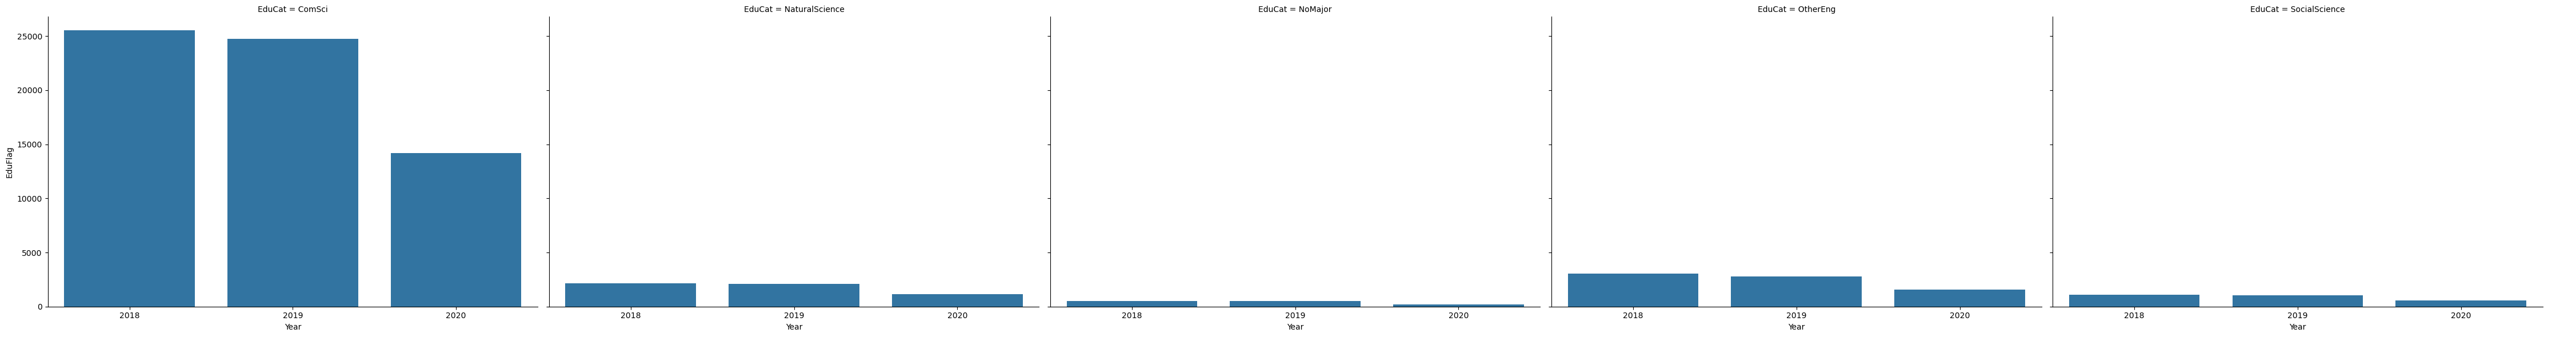

In [44]:
# Sort by ID and Year so that each person's data is carried backwards correctly
df = df.sort_values(['RespondentID','Year'])

df['UndergradMajor'].bfill(axis=0, inplace=True)

# Key major groups outlined in the Stack Overflow survey
majors = ['social science','natural science','computer science','development','another engineering','never declared']

edudf = df[['Year','UndergradMajor']]
edudf.dropna(how='any', inplace=True)
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)natural science'), 'NaturalScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)computer science'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)development'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)another engineering'), 'OtherEng'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True

edudf = edudf.melt(id_vars=['Year'], 
    value_vars=['SocialScience','NaturalScience','ComSci','OtherEng','NoMajor'], 
    var_name='EduCat',
    value_name='EduFlag')

edudf.dropna(how='any', inplace=True)
edudf = edudf.groupby(['Year','EduCat']).count().reset_index()

eduFig = sns.catplot(x="Year", y='EduFlag', col="EduCat",
                data=edudf, kind="bar",
                height=6, aspect=1.5);


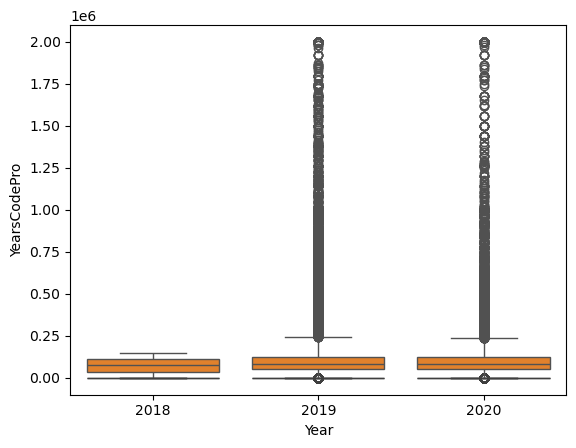

In [45]:
compFields = df[['Year','YearsCodePro','ConvertedComp']]

D = sns.boxplot(x="Year", y="YearsCodePro",
            data=compFields)

E = sns.boxplot(x="Year", y="ConvertedComp",
            data=compFields)

C:\Users\AdamLaviguer\AppData\Local\Temp\ipykernel_5268\2095221704.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)


<Axes: xlabel='CodeYearBins', ylabel='ConvertedComp'>

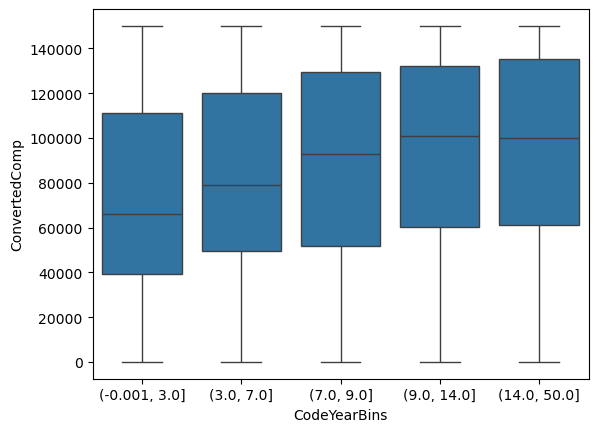

In [46]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

imputedf = df[['YearsCodePro','ConvertedComp']]

traindf, testdf = train_test_split(imputedf, train_size=0.1)

# Create the IterativeImputer model to predict missing values
imp = IterativeImputer(max_iter=20, random_state=0)

# Fit the model to the the test dataset
imp.fit(imputedf)

# Transform the model on the entire dataset
compdf = pd.DataFrame(np.round(imp.transform(imputedf),0), columns=['YearsCodePro','ConvertedComp'])


compPlotdf = compdf.loc[compdf['ConvertedComp'] <= 150000]
compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)

sns.boxplot(x="CodeYearBins", y="ConvertedComp",
            data=compPlotdf)